In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import os

In [2]:
scenario = ['PAK', 'RUS', 'HOA', 'URU', 'ALL']

df = [ pd.read_csv(scenario[i] + '-Losses.csv') for i in range(len(scenario)) ]
print(df[2].head())

FileNotFoundError: [Errno 2] No such file or directory: 'PAK-Losses.csv'

In [ ]:
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

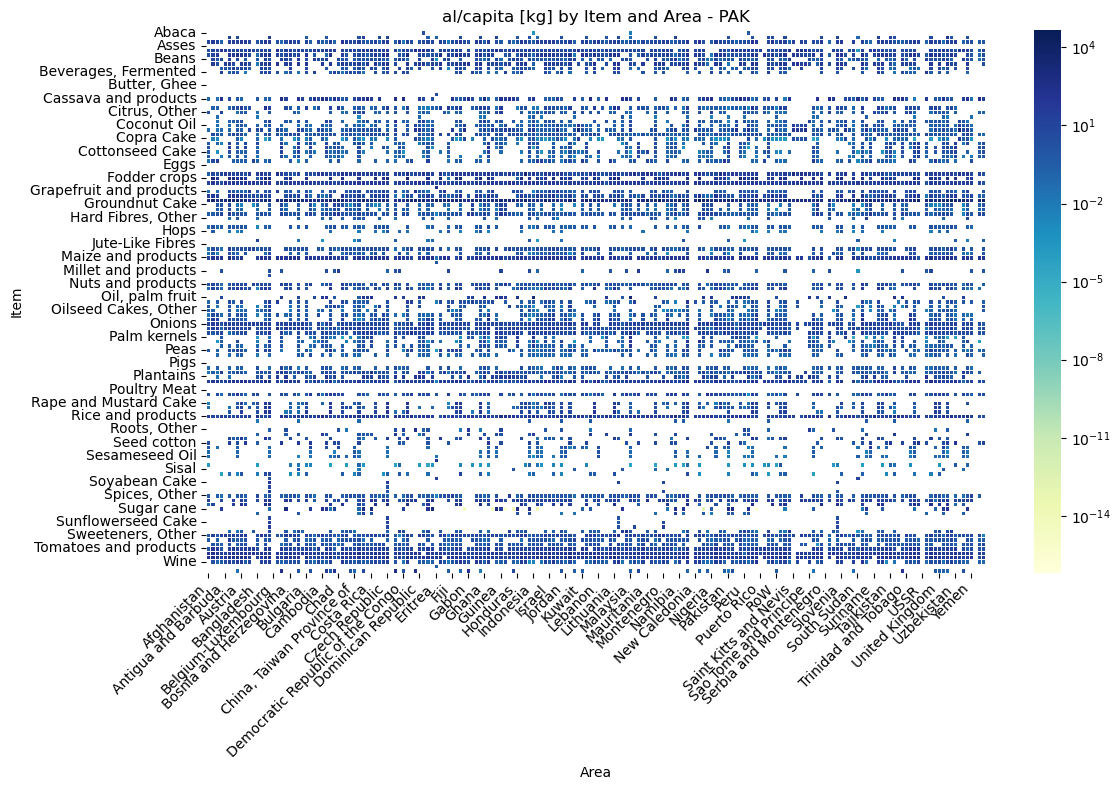

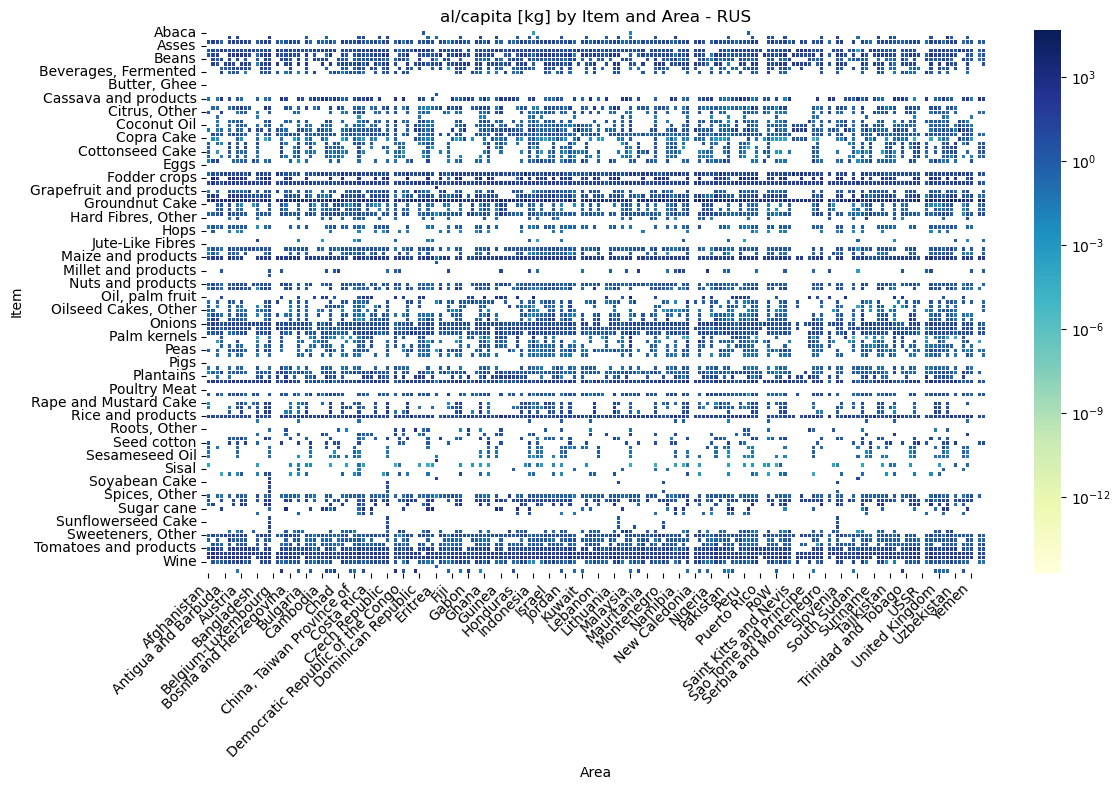

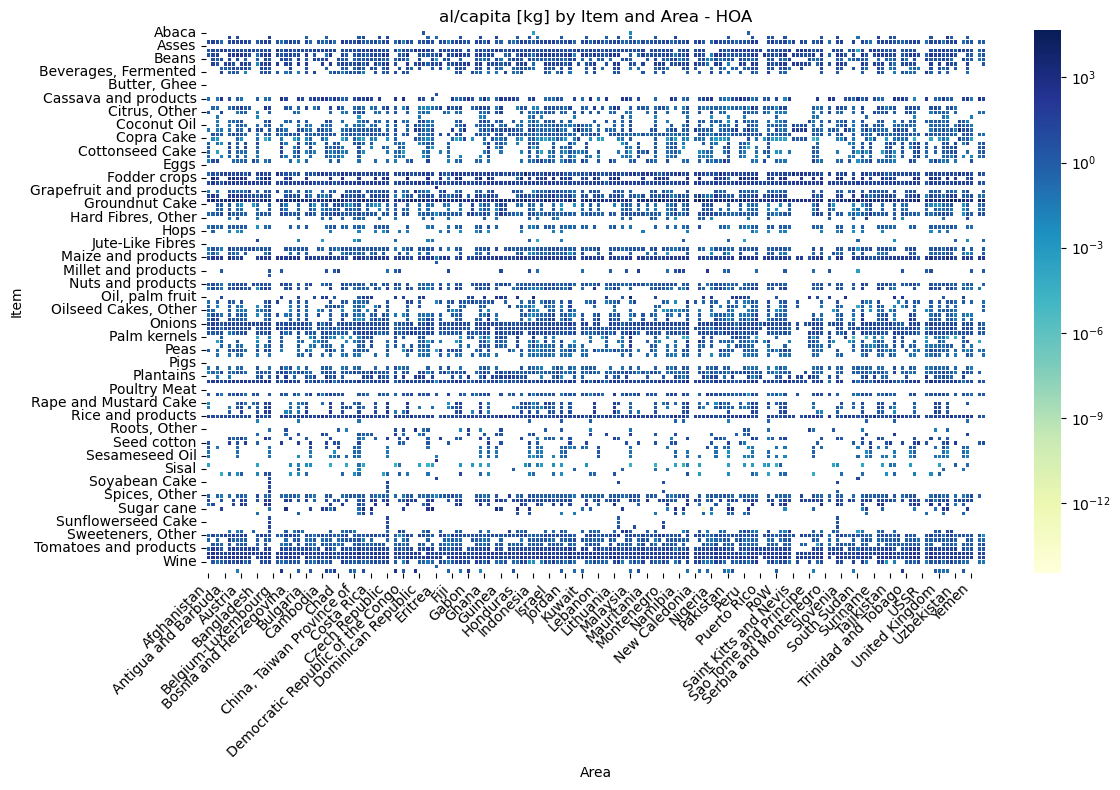

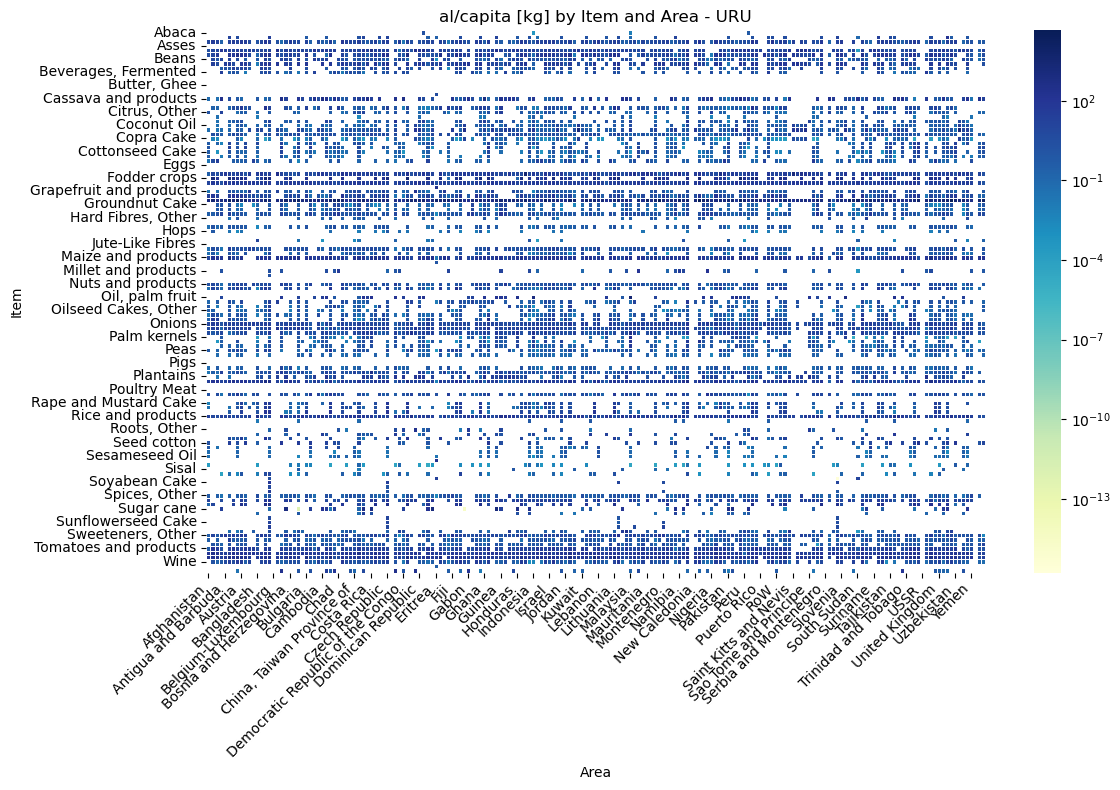

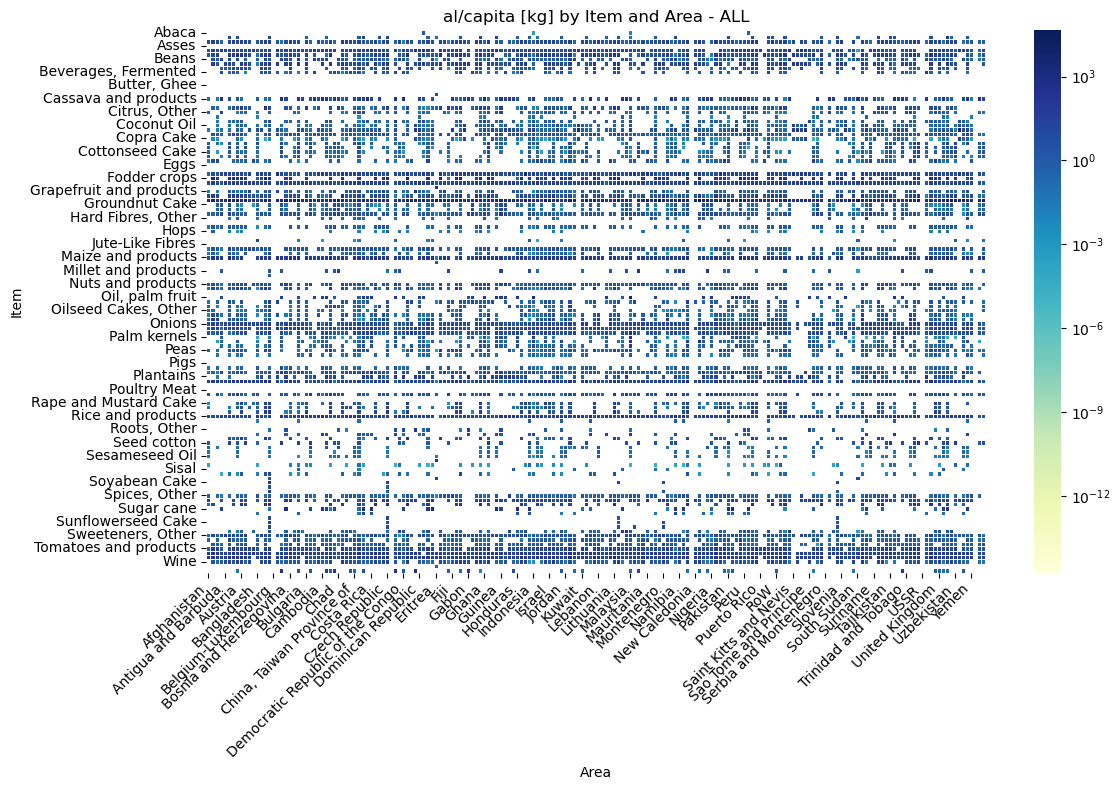

In [ ]:
for i in range(len(scenario)):
    # Create pivot table
    pivot_table = df[i].pivot_table(
        index='item',
        columns='area',
        values='al/capita [kg]',
        aggfunc='sum',
        fill_value=0
    )

    # Replace zeros with NaN for log scale compatibility
    masked_data = pivot_table.replace(0, np.nan)

    # Get all positive values (ignoring NaN)
    positive_values = masked_data[masked_data > 0].values.flatten()
    positive_values = positive_values[~np.isnan(positive_values)]

    # Check for valid data
    vmin = positive_values.min() if len(positive_values) > 0 else 1e-6
    vmax = positive_values.max() if len(positive_values) > 0 else 1

    # Define a more varied color palette
    cmap = sns.color_palette("YlGnBu", as_cmap=True)
    cmap.set_bad(color='white')  # for NaN entries

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        masked_data,
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=0.5
    )
    plot_title = f"al/capita [kg] by Item and Area - {scenario[i]}"
    plt.title(plot_title)
    plt.xlabel("Area")
    plt.ylabel("Item")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Save the plot
    filename = f"al_per_capita_{scenario[i].replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)

    plt.show()

/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_23941/2651376458.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


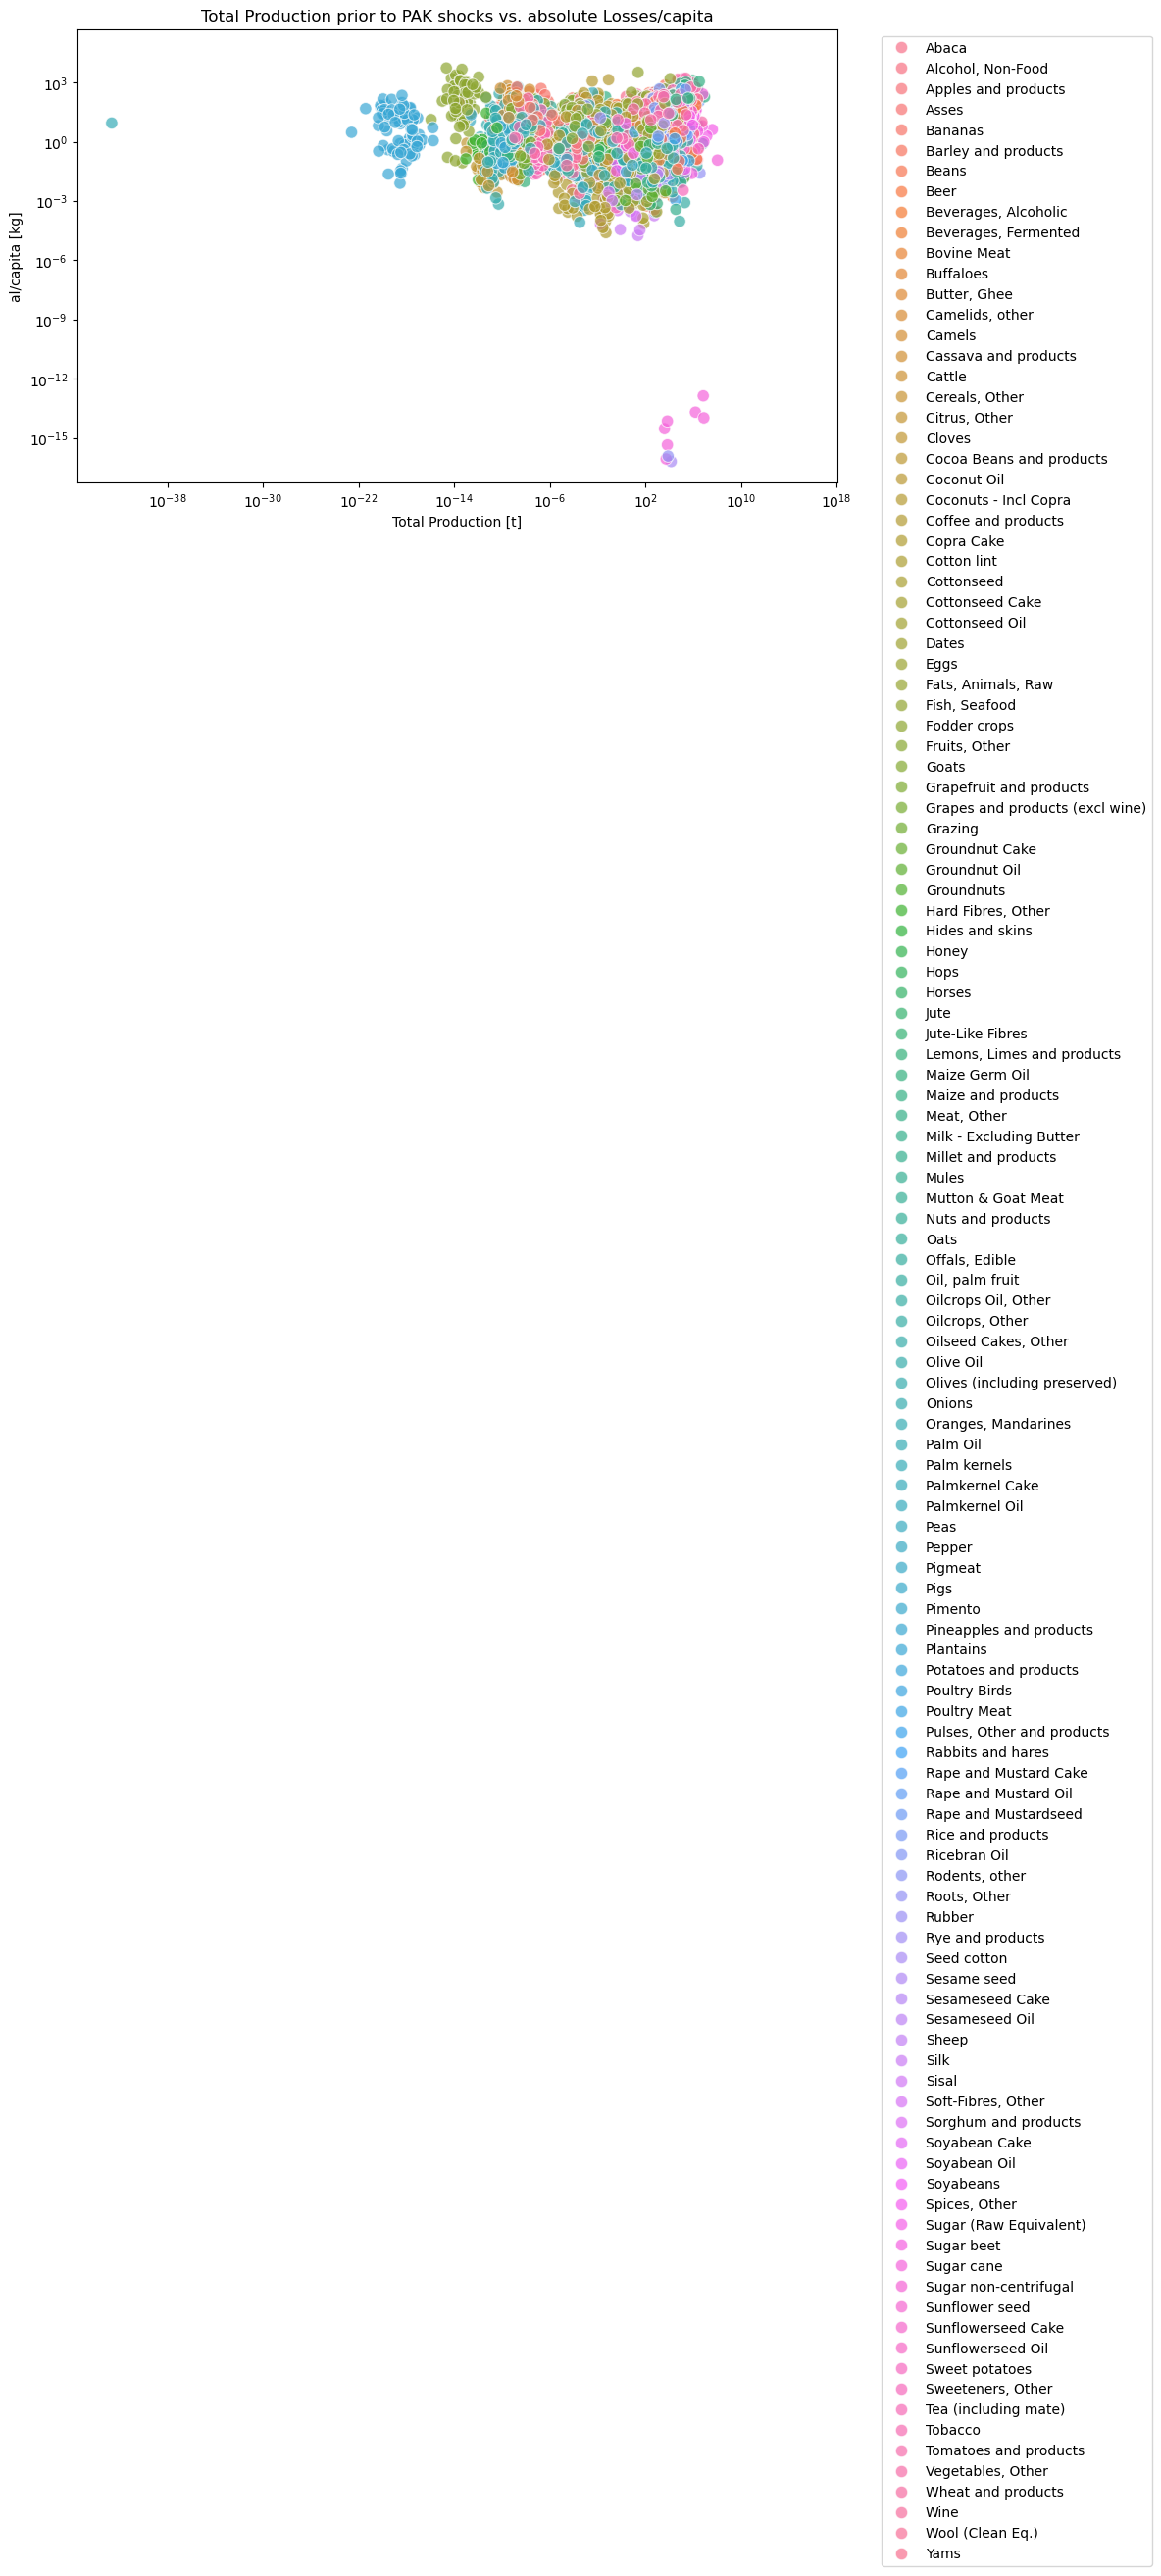

/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_23941/2651376458.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


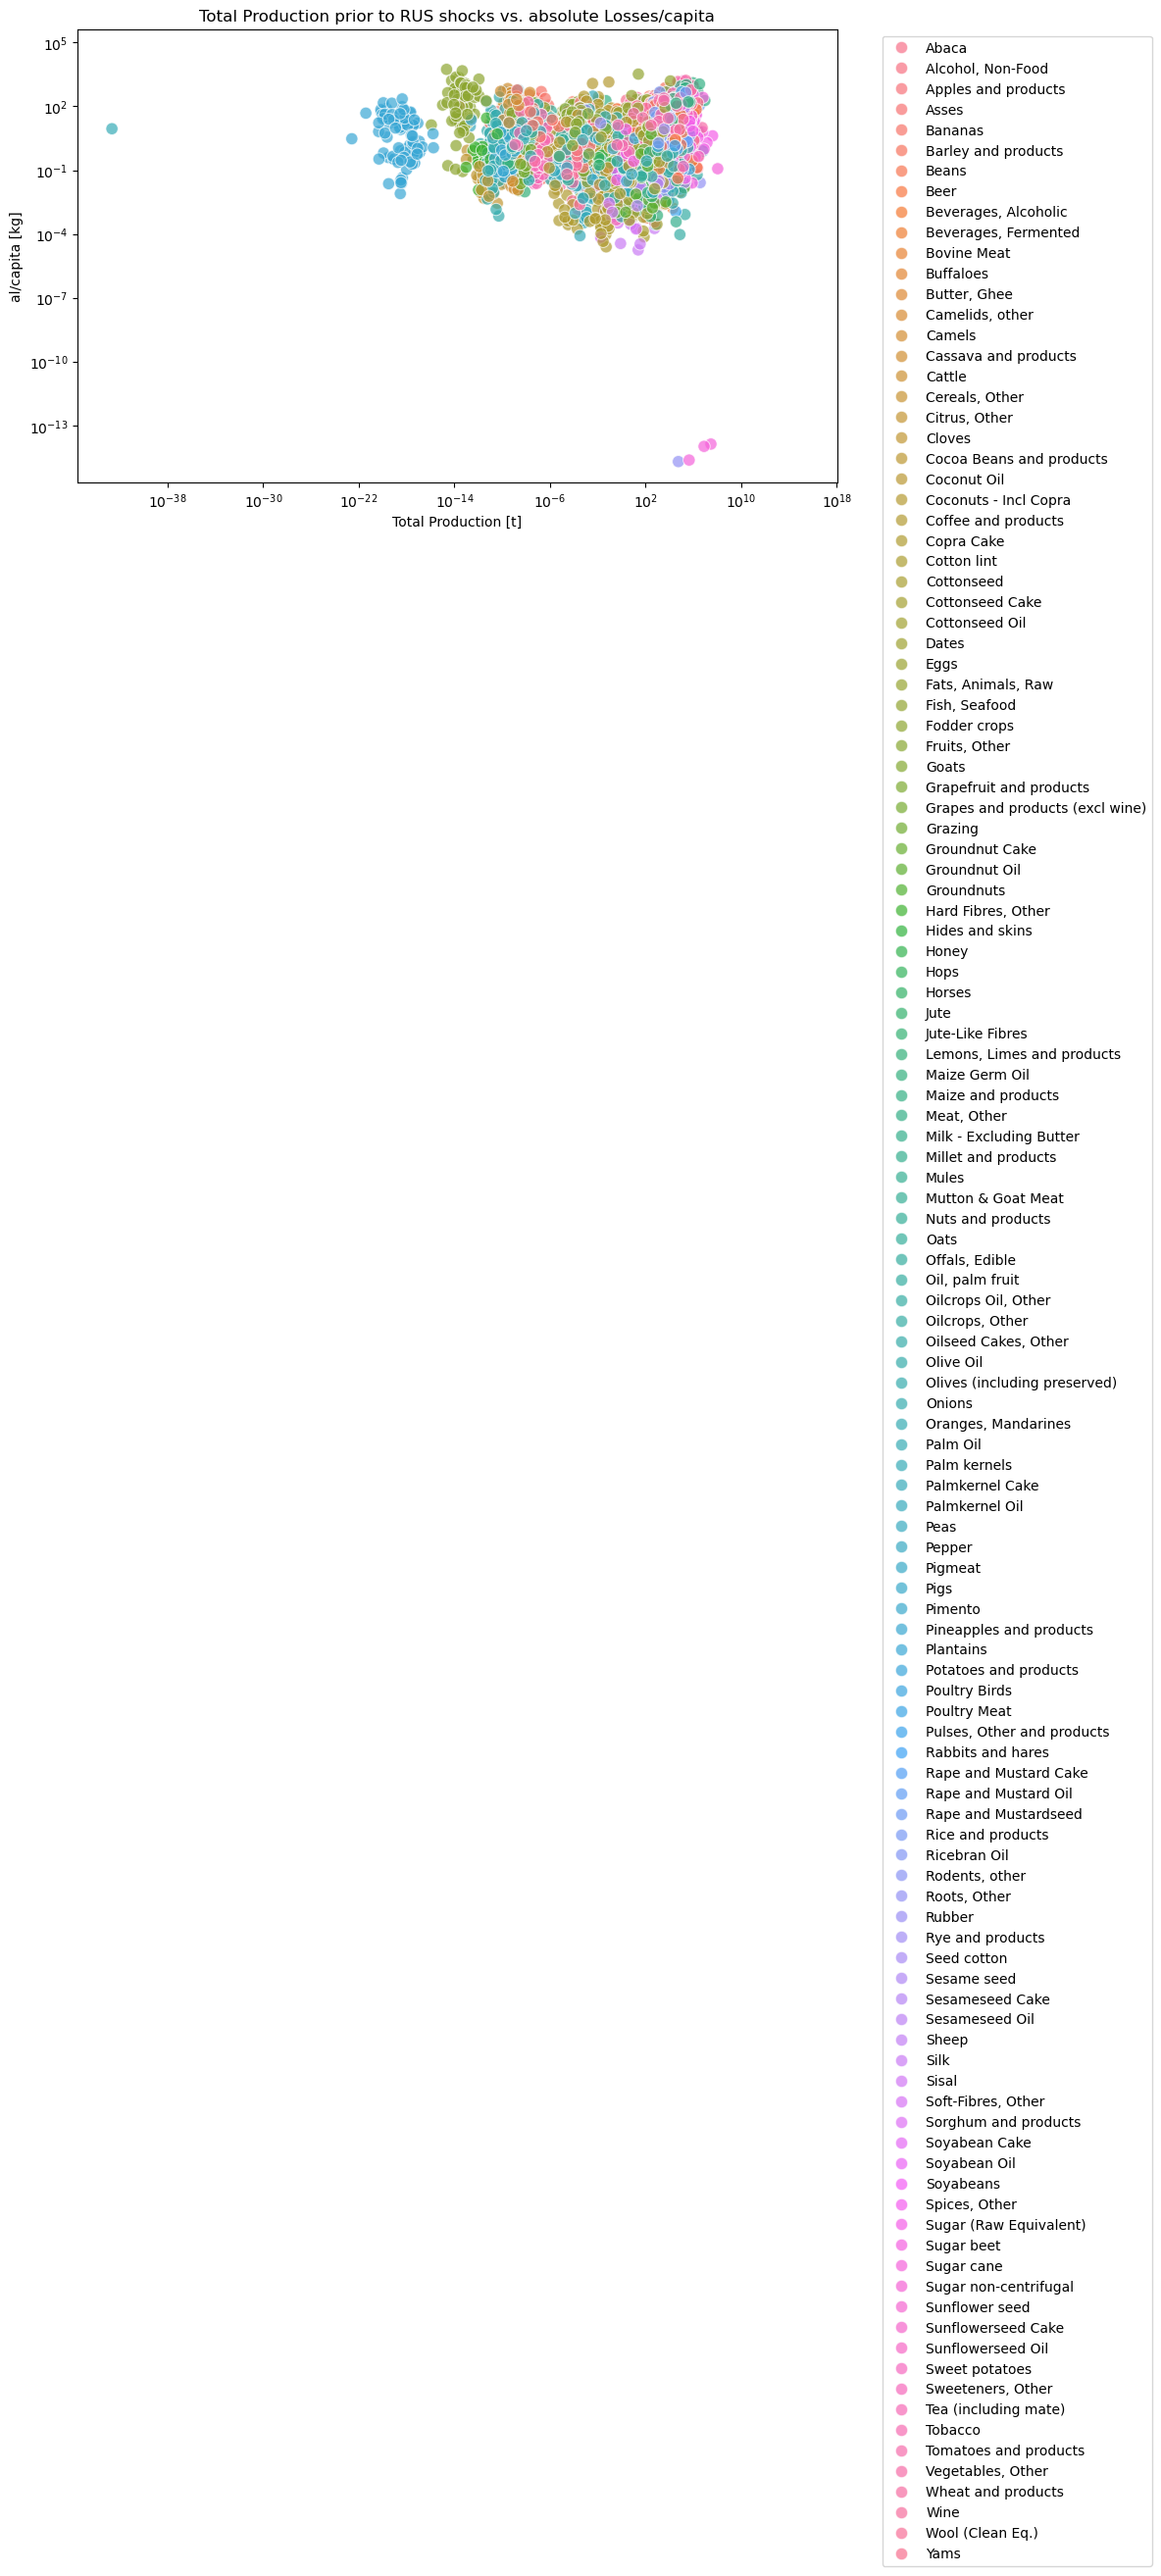

/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_23941/2651376458.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


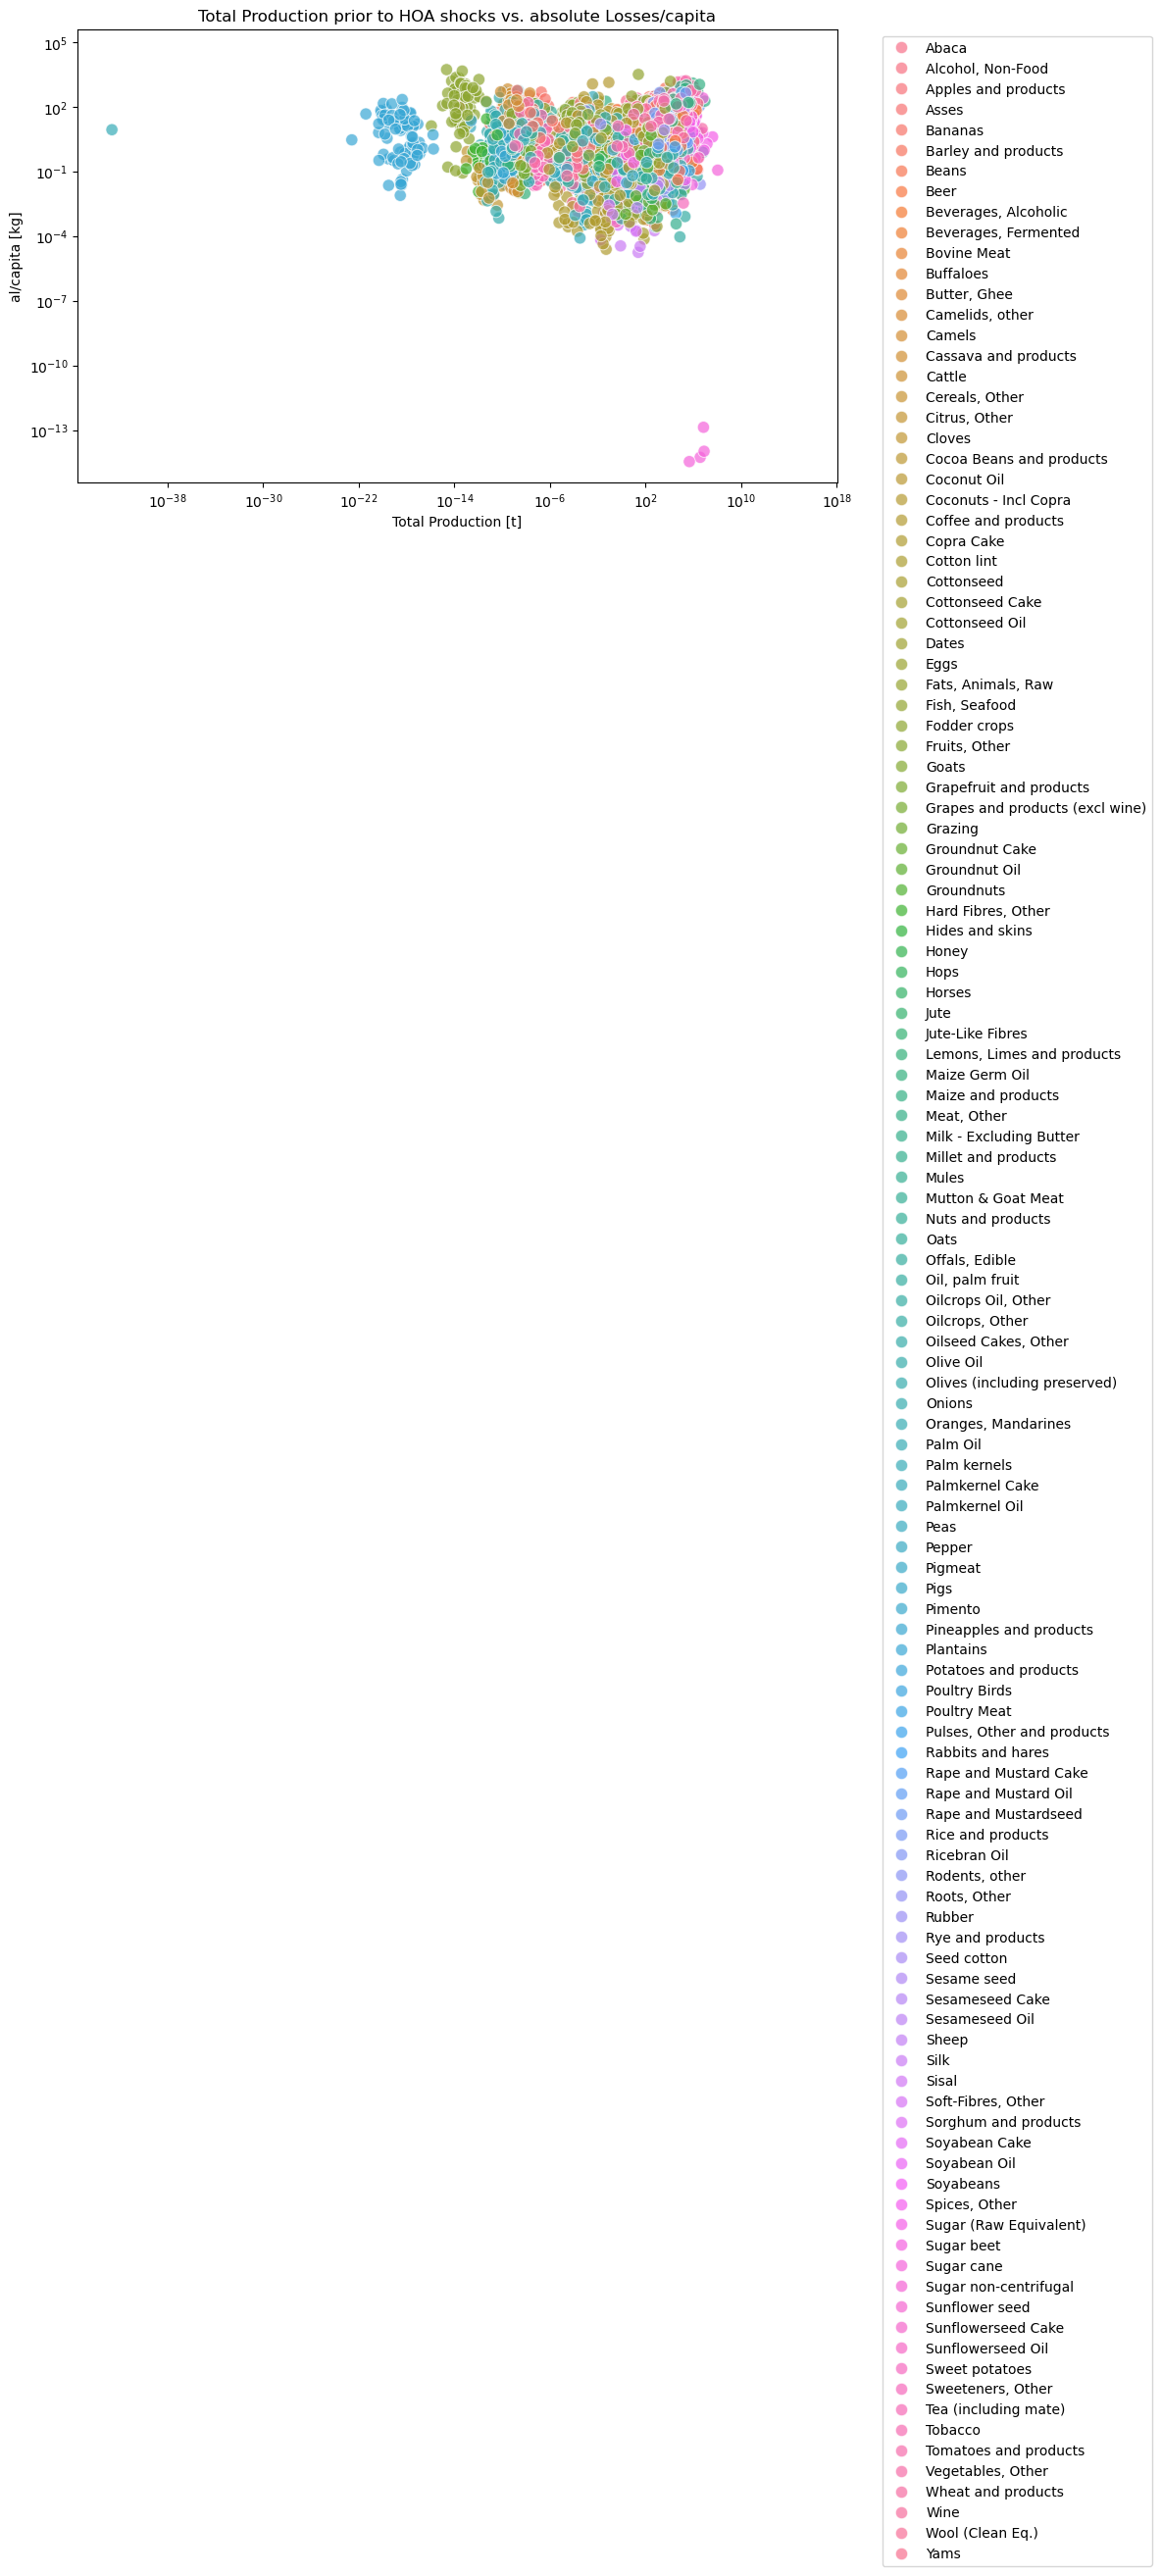

/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_23941/2651376458.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


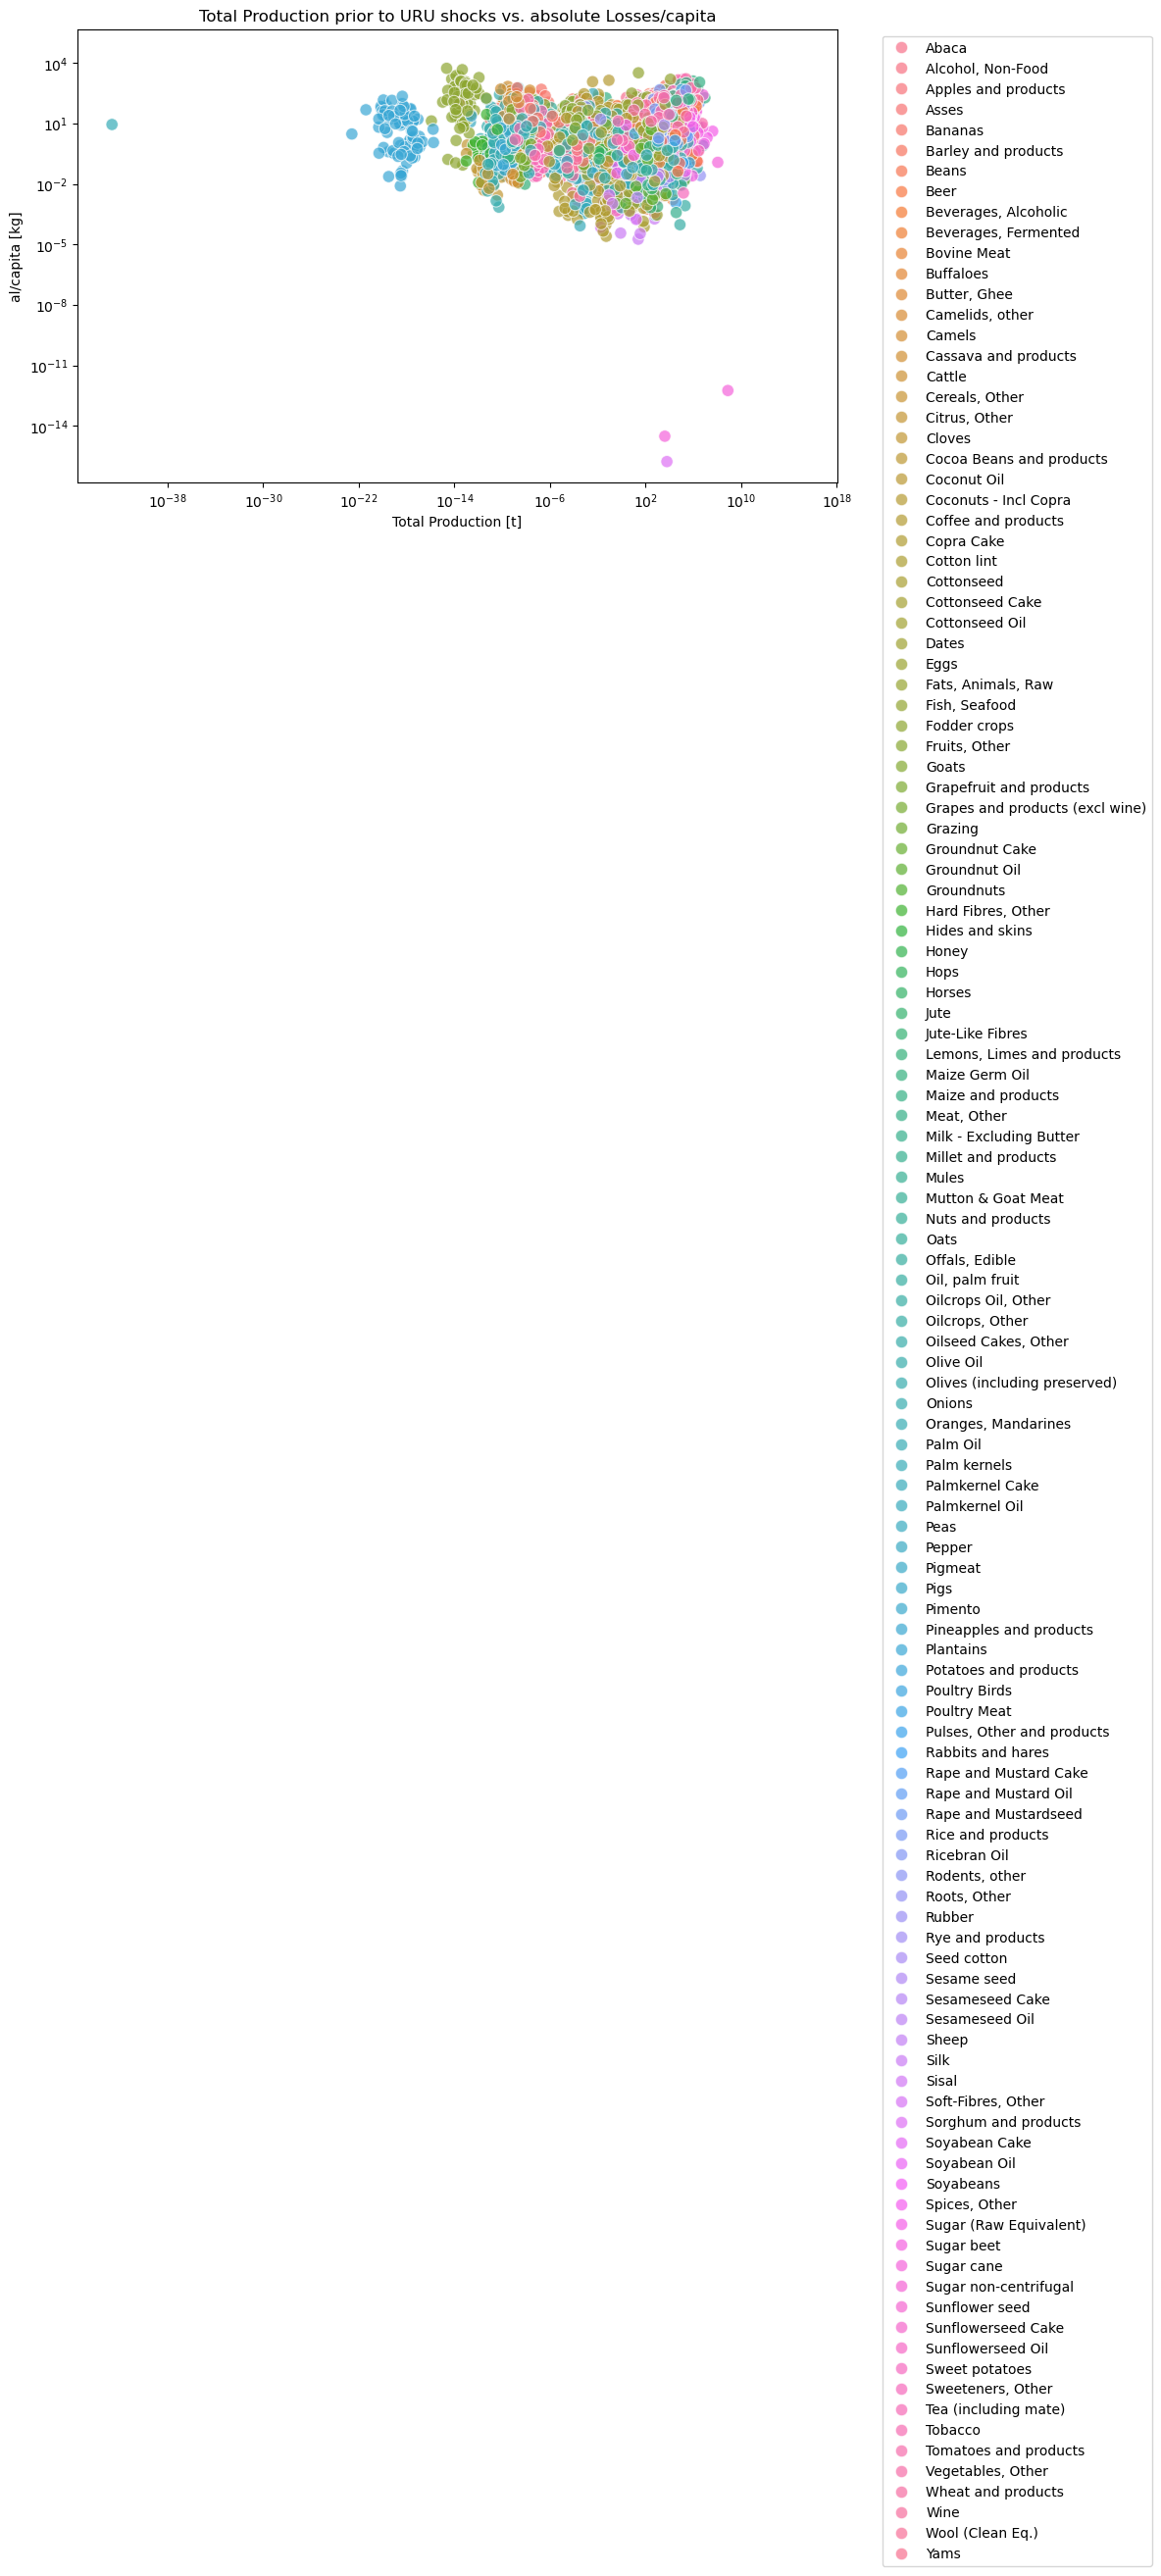

/var/folders/fc/k0ssmt390m779swj1xmy_6lw0000gn/T/ipykernel_23941/2651376458.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


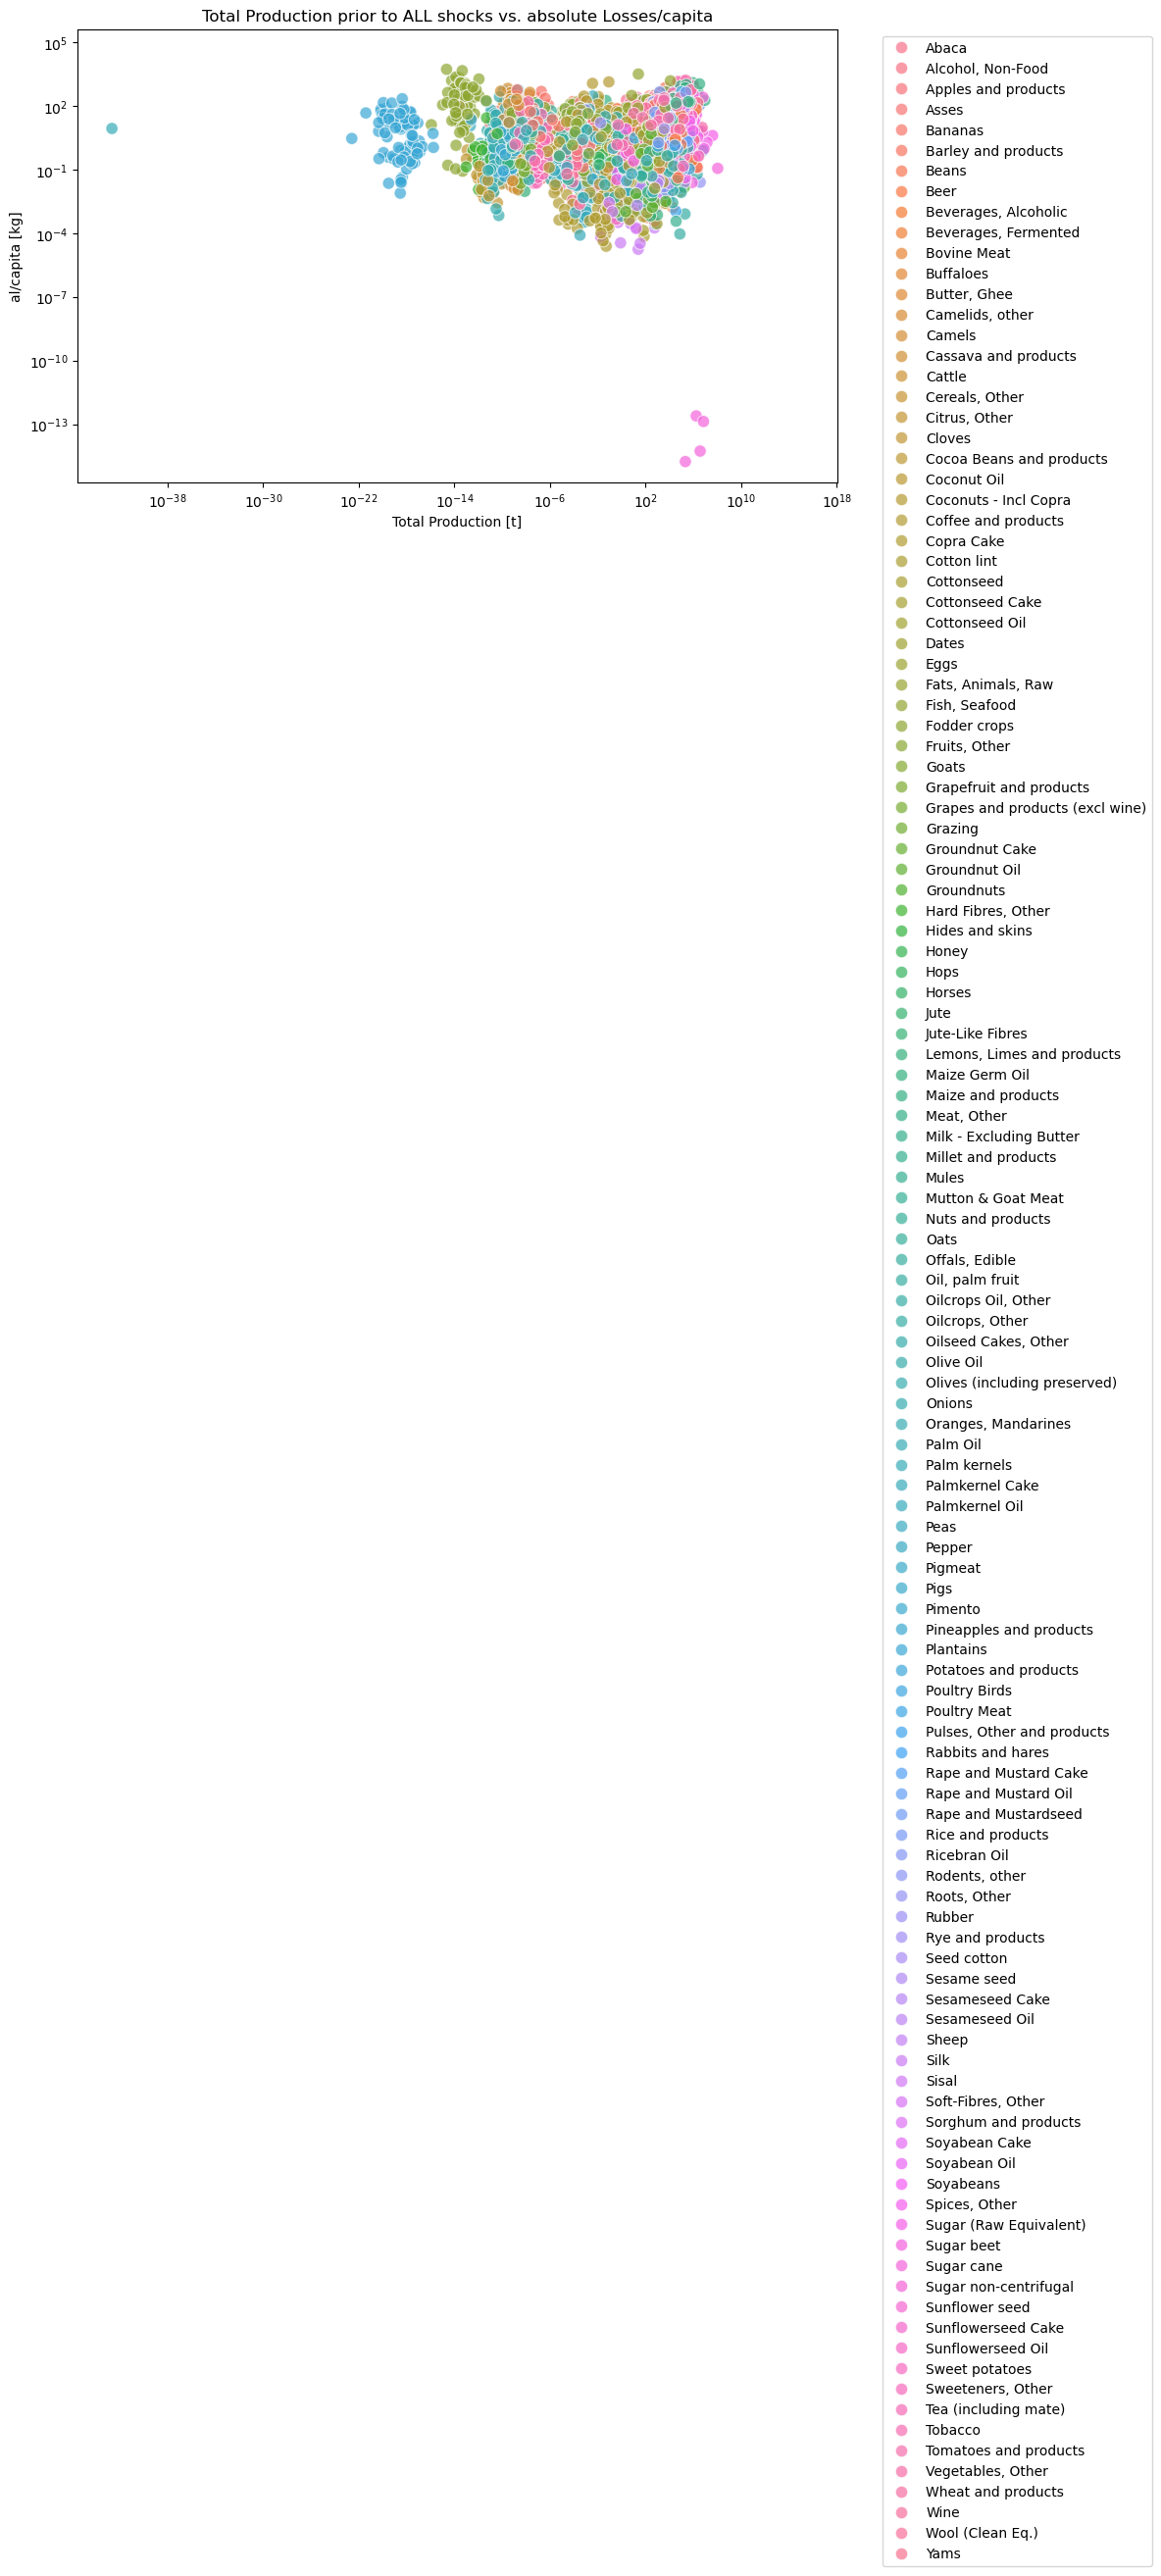

In [ ]:

for i in range(len(scenario)):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df[i],
        x='amount [t]',
        y='al/capita [kg]',
        hue='item',
        alpha=0.7,
        edgecolor='w',
        s=80
    )

    plot_title = f"Total Production prior to {scenario[i]} shocks vs. absolute Losses/capita"
    plt.title(plot_title)
    plt.xlabel("Total Production [t]")
    plt.ylabel("al/capita [kg]")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
    plt.tight_layout()

    # Save the figure
    filename = f"scatter_al_per_capita_{scenario[i].replace(' ', '_')}.png"
    plt.savefig(os.path.join(output_dir, filename), dpi=300)

    plt.show()

In [ ]:

for i in range(len(scenario)):
    data = df[i]
    df_rice = data[data['item'] == 'Rice and products']
    
    rice_losses_by_country = df_rice.groupby('area')['al/capita [kg]'].sum().reset_index()

    fig = px.choropleth(
        rice_losses_by_country,
        locations="area",
        locationmode="country names",
        color="al/capita [kg]",
        hover_name="area",
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f"Absolute Losses/c for 'Rice and products' by Country after {scenario[i]}",
        projection="natural earth"
    )

    # Save the figure
    filename = f"choropleth_rice_losses_{scenario[i].replace(' ', '_')}.png"
    fig.write_image(os.path.join(output_dir, filename), scale=2)  # scale=2 for better resolution

    fig.show()

In [ ]:
for i in range(len(scenario)):
    data = df[i]
    df_poultry = data[data['item'] == 'Poultry Birds']
    
    poultry_losses_by_country = df_poultry.groupby('area')['al/capita [kg]'].sum().reset_index()

    fig = px.choropleth(
        poultry_losses_by_country,
        locations="area",
        locationmode="country names",
        color="al/capita [kg]",
        hover_name="area",
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f"Absolute Losses/c for 'Poultry Birds' by Country after {scenario[i]}",
        projection="natural earth"
    )

    # Save the figure
    filename = f"choropleth_poultry_losses_{scenario[i].replace(' ', '_')}.png"
    fig.write_image(os.path.join(output_dir, filename), scale=2)

    fig.show()

In [ ]:
for i in range(len(scenario)):
    data = df[i]
    df_maize = data[data['item'] == 'Maize and products']
    
    maize_losses_by_country = df_maize.groupby('area')['al/capita [kg]'].sum().reset_index()

    fig = px.choropleth(
        maize_losses_by_country,
        locations="area",
        locationmode="country names",
        color="al/capita [kg]",
        hover_name="area",
        color_continuous_scale=px.colors.sequential.Plasma,
        title=f"Absolute Losses/c for 'Maize and products' by Country after {scenario[i]}",
        projection="natural earth"
    )

    # Save figure as PNG
    filename = f"choropleth_maize_losses_{scenario[i].replace(' ', '_')}.png"
    fig.write_image(os.path.join(output_dir, filename), scale=2)

    # Display the map
    fig.show()